## Importing the relevant packages


In [34]:
import pandas as pd #Biblioteca pandas utilizado para el analissis de datos
import numpy as np #Biblioteca para realizar cálculos numéricos y operaciones matemáticas en arreglos multidimensionales
import matplotlib.pyplot as plt #Biblioteca para graficar
import statsmodels.graphics.tsaplots as sgt  #Acceder a las funciones y gráficos relacionados con el análisis de series temporales ACF PACF
from statsmodels.tsa.arima.model import ARIMA #Utiliza para crear y ajustar modelos autorregresivos de media móvil (ARMA) a series temporales.  
from scipy.stats.distributions import chi2 #Importa la distribución chi-cuadrado
import statsmodels.tsa.stattools as sts #Pruebas de estacionariedad, pruebas de autocorrelación, funciones de autocorrelación y más.
import seaborn as sns #Proporciona una interfaz de alto nivel para crear gráficos atractivos y informativos.
sns.set() #Ajusta automáticamente varios aspectos de la visualización

## Importing the Data and Pre-processing 

In [35]:
raw_csv_data = pd.read_csv("Index2023.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = False)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill') #Metodo de llenado de datos hacia adelante

In [36]:
#Creando una nueva columna "market_value" y copiando los valores de la columna "ftse" en esa nueva columna.
df_comp['market_value']=df_comp.ftse

In [37]:
#Eliminar columnas spx, dax, ftse, nikkei
# del df_comp['spx'] >>> Esta columna ya no esta en el dataframe
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

#Calcular el tamaño del conjunto de entrenamiento (80% de los datos) 
#División de datos para el entrenamiento y la prueba en el contexto de análisis de datos
size = int(len(df_comp)*0.8)

#Seleccionar las primeras filas del df_comp, hasta la posición size
#Se utiliza para seleccionar desde size hasta la ultima fila de los datos
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

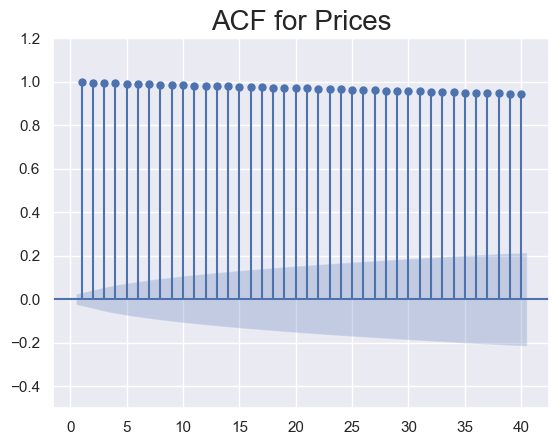

In [38]:
#zero=False: Este argumento indica que no se debe incluir el valor de retraso cero en el gráfico
#Número de valores de retraso (lags) que se mostrarán en el gráfico
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.ylim(-0.5,1.2)
plt.show()

In [39]:
#Se utiliza para suprimir las advertencias (warnings) que se generan durante la ejecución de un programa de Python.
import warnings
warnings.filterwarnings("ignore")

## The PACF

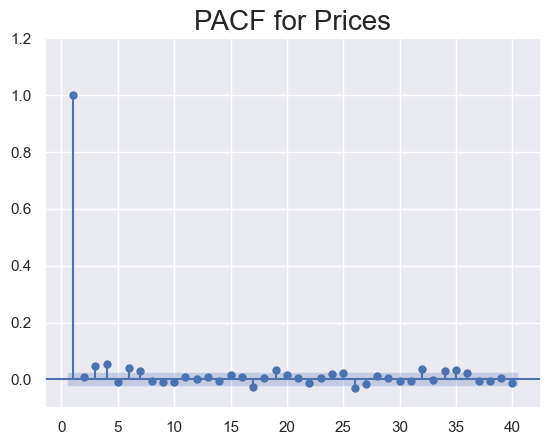

In [40]:
#lags=40: Este argumento especifica el número de valores de retraso (lags) que se mostrarán en el gráfico
#alpha=0.05: El nivel de confianza para calcular los intervalos de confianza en el gráfico de PACF. En este caso, se utiliza un nivel de confianza del 5%
#zero=False: Este argumento indica que no se debe incluir el valor de retraso cero en el gráfico. 
#method='ols': Método utilizado para calcular los coeficientes de autocorrelación parcial. En este caso utiliza Mínimos Cuadrados Ordinarios (OLS).
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.ylim(-0.1,1.2)
plt.show()

## The AR(1) Model

In [41]:
#En versiones recientes de StatsModels, la clase ARMA se ha eliminado y se recomienda utilizar SARIMAX incluso para modelos ARMA.
#Aquí tienes un ejemplo actualizado de cómo ajustar un modelo ARMA utilizando SARIMAX
import statsmodels.api as sm
model_ar = sm.tsa.SARIMAX(df.market_value, order=(1,0,0))

In [42]:
results_ar = model_ar.fit()

In [43]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -34043.104
Date:                Mon, 09 Oct 2023   AIC                          68090.208
Time:                        21:22:33   BIC                          68103.672
Sample:                    01-07-1994   HQIC                         68094.876
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   7612.765      0.000       1.000       1.000
sigma2      3435.8678     36.702     93.615      0.000    3363.933    3507.803
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):              3580.28
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models

In [44]:
model_ar_2 = sm.tsa.SARIMAX(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -34042.640
Date:                Mon, 09 Oct 2023   AIC                          68091.280
Time:                        21:22:37   BIC                          68111.477
Sample:                    01-07-1994   HQIC                         68098.283
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9909      0.009    112.445      0.000       0.974       1.008
ar.L2          0.0090      0.009      1.023      0.306      -0.008       0.026
sigma2      3436.3944     36.785     93.419      0.000    3364.298    3508.491
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3570.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.20
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model_ar_3 = sm.tsa.SARIMAX(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -34035.605
Date:                Mon, 09 Oct 2023   AIC                          68079.209
Time:                        21:22:43   BIC                          68106.138
Sample:                    01-07-1994   HQIC                         68088.545
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9907      0.009    111.745      0.000       0.973       1.008
ar.L2         -0.0382      0.012     -3.145      0.002      -0.062      -0.014
ar.L3          0.0474      0.008      5.693      0.000       0.031       0.064
sigma2      3428.8193     36.743     93.319      0.000    3356.804    3500.834
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3581.12
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.23
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model_ar_4 = sm.tsa.SARIMAX(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(4, 0, 0)   Log Likelihood              -34772.154
Date:                Mon, 09 Oct 2023   AIC                          69554.307
Time:                        21:22:51   BIC                          69587.969
Sample:                    01-07-1994   HQIC                         69565.978
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8617      0.010     87.321      0.000       0.842       0.881
ar.L2          0.3382      0.014     24.200      0.000       0.311       0.366
ar.L3         -0.6724      0.013    -50.800      0.000      -0.698      -0.646
ar.L4          0.4710      0.009     51.657      0.000       0.453       0.489
sigma2      4210.7779     57.903     72.721      0.000    4097.289    4324.266
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              2951.66
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR Test

In [47]:
#Realizar una prueba de razón de verosimilitud (LLR) entre dos modelos
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(4)
    return p

## Comparing Higher-Lag AR Models

In [48]:
LLR_test(model_ar_2, model_ar_3)
#Rechazar la hipótesis nula
#El modelo alternativo (model_ar_3) es preferible al modelo nulo (model_ar_2) en función de la verosimilitud de los datos observados.

0.0002

In [49]:
LLR_test(model_ar_3, model_ar_4)
#No hay evidencia estadística para rechazar la hipótesis nula
#Ambos modelos (model_ar_2 y model_ar_3) tienen un rendimiento similar en términos de ajuste a los datos observados 
#y que no hay suficiente evidencia para preferir uno sobre el otro en función de la verosimilitud

1.0

In [50]:
model_ar_4 = sm.tsa.SARIMAX(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(4, 0, 0)   Log Likelihood              -34772.154
Date:                Mon, 09 Oct 2023   AIC                          69554.307
Time:                        21:23:33   BIC                          69587.969
Sample:                    01-07-1994   HQIC                         69565.978
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8617      0.010     87.321      0.000       0.842       0.881
ar.L2          0.3382      0.014     24.200      0.000       0.311       0.366
ar.L3         -0.6724      0.013    -50.800      0.0

In [51]:
model_ar_5 = sm.tsa.SARIMAX(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

#Rechazar la hipótesis nula
#El modelo alternativo (model_ar_5) es preferible al modelo nulo (model_ar_4) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -34220.892
Date:                Mon, 09 Oct 2023   AIC                          68453.784
Time:                        21:23:49   BIC                          68494.178
Sample:                    01-07-1994   HQIC                         68467.788
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0140      0.012     84.430      0.000       0.990       1.038
ar.L2         -0.0474      0.016     -2.875      0.004      -0.080      -0.015
ar.L3          0.0762      0.016      4.769      0.0

In [52]:
model_ar_6 = sm.tsa.SARIMAX(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

#No hay evidencia estadística para rechazar la hipótesis nula
#Ambos modelos (model_ar_5 y model_ar_6) tienen un rendimiento similar en términos de ajuste a los datos observados 
#y que no hay suficiente evidencia para preferir uno sobre el otro en función de la verosimilitud


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(6, 0, 0)   Log Likelihood              -34527.342
Date:                Mon, 09 Oct 2023   AIC                          69068.684
Time:                        21:24:11   BIC                          69115.810
Sample:                    01-07-1994   HQIC                         69085.022
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8097      0.009     91.093      0.000       0.792       0.827
ar.L2          0.3293      0.011     30.231      0.000       0.308       0.351
ar.L3         -0.3978      0.010    -37.913      0.0

In [53]:
model_ar_7 = sm.tsa.SARIMAX(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

#No hay evidencia estadística para rechazar la hipótesis nula
#Ambos modelos (model_ar_6 y model_ar_7) tienen un rendimiento similar en términos de ajuste a los datos observados 
#y que no hay suficiente evidencia para preferir uno sobre el otro en función de la verosimilitud

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(7, 0, 0)   Log Likelihood              -34891.304
Date:                Mon, 09 Oct 2023   AIC                          69798.608
Time:                        21:24:34   BIC                          69852.466
Sample:                    01-07-1994   HQIC                         69817.280
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.009     80.424      0.000       0.700       0.735
ar.L2          0.3692      0.013     29.414      0.000       0.345       0.394
ar.L3         -0.1050      0.014     -7.587      0.0

In [54]:
model_ar_8 = sm.tsa.SARIMAX(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

#Rechazar la hipótesis nula
#El modelo alternativo (model_ar_8) es preferible al modelo nulo (model_ar_7) en función de la verosimilitud de los datos observados.

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(8, 0, 0)   Log Likelihood              -34425.303
Date:                Mon, 09 Oct 2023   AIC                          68868.606
Time:                        21:24:59   BIC                          68929.197
Sample:                    01-07-1994   HQIC                         68889.613
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8496      0.009     97.564      0.000       0.833       0.867
ar.L2          0.2331      0.012     20.164      0.000       0.210       0.256
ar.L3         -0.2851      0.011    -25.705      0.0

In [55]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

#No hay evidencia estadística para rechazar la hipótesis nula
#Ambos modelos (model_ar y model_ar_7) tienen un rendimiento similar en términos de ajuste a los datos observados 
#y que no hay suficiente evidencia para preferir uno sobre el otro en función de la verosimilitud

LLR test: 1.0


## Analysing the Residuals

In [56]:
#Agregando una nueva columna llamada "res_price" al df. Esta columna contendrá los residuos del modelo results_ar_7, 
#que son las diferencias entre los valores reales de la serie temporal y las predicciones del modelo.
df['res_price'] = results_ar_7.resid

In [57]:
df.res_price.mean() #Calcula la media de los valores en la columna res_price

2.0623528675762417

In [58]:
df.res_price.var() #Calcula la varianza de los valores en la columna res_price

6425.492168131166

In [59]:
#Prueba de dickey y fuller
sts.adfuller(df.res_price)

#Ho = Raiz unitaria (No es estacionario)
#Ha = No hay raiz unitaria (Es estacionario)

(-14.887235327732359,
 1.576786073204992e-27,
 34,
 6165,
 {'1%': -3.4314111556982785,
  '5%': -2.862008935577242,
  '10%': -2.567019611619896},
 67991.36340571495)

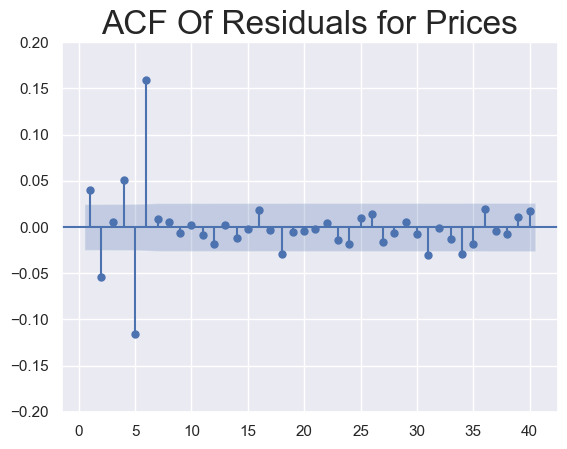

In [60]:
#Calculará la ACF
#zero=False: Utiliza para excluir el retraso cero en el gráfico de ACF
#lags=40: Determina hasta qué retraso se calculará la ACF y se mostrará en el gráfica
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.ylim(-0.2,0.2)
plt.show()

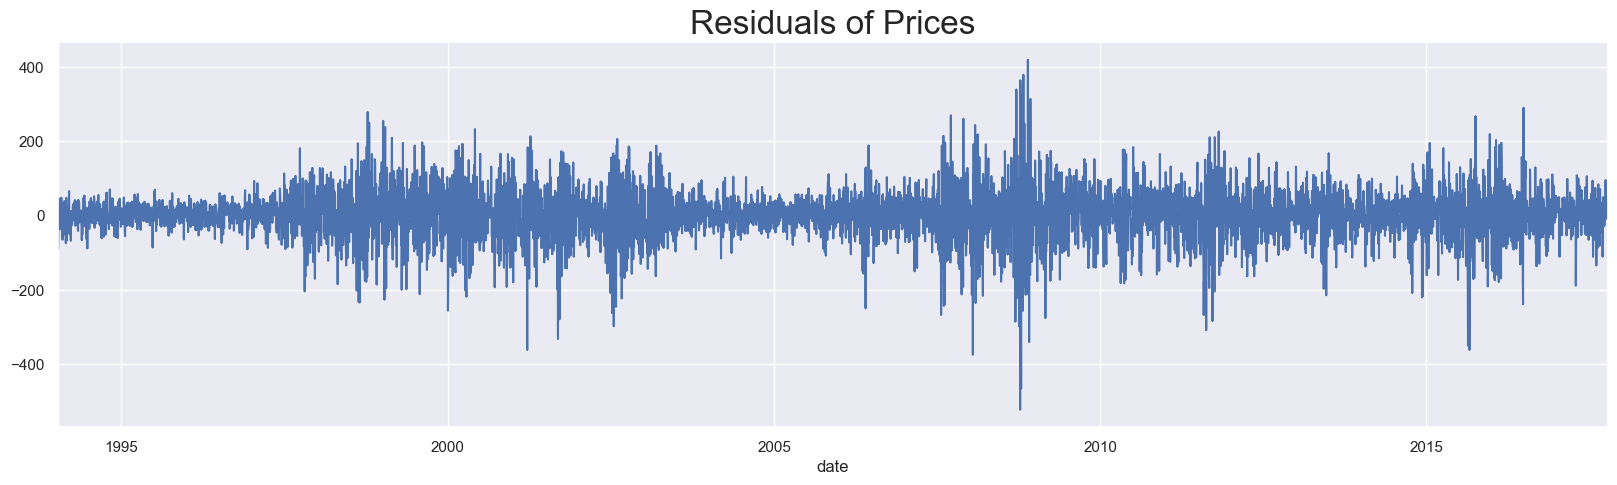

In [61]:
#Gráfico de la serie de tiempo de los residuos
#[1:] se utiliza para excluir el primer valor de los residuos
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()